---
# <font color="DarkBlue"><b><center>Optimization</center></b></font>
---
## <font color="DarkGreen"><center>Ransomware dynamics: Mitigating personal data exfiltration through the SCIRAS lens</font>
### <center>**Solution to Ordinary Differential Equations**<center>

**Author:** David Cevallos-Salas, José Estrada-Jiménez, Danny S. Guamán, Luis Felipe Urquiza<br>
**Date:** 2024-07-09

In this notebook is resolved the Model's Ordinary Differential Equations

In [ ]:
try:
    from gekko import GEKKO
except:
    !pip install gekko
    from gekko import GEKKO

!pip show gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 15.6 MB/s eta 0:00:00
Name: gekko
Version: 1.2.1
Summary: Machine learning and optimization for dynamic systems
Home-page: https://github.com/BYU-PRISM/GEKKO
Author: BYU PRISM Lab
Author-email: support@apmonitor.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 


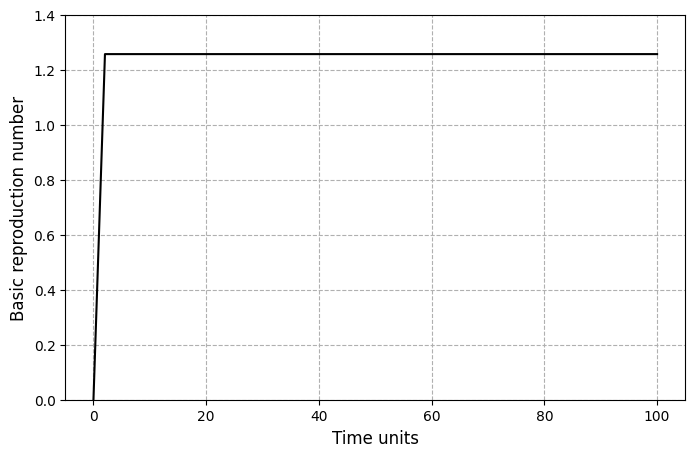

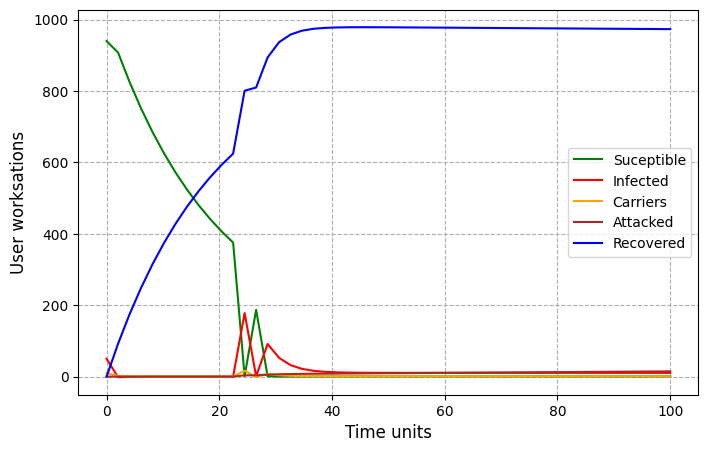

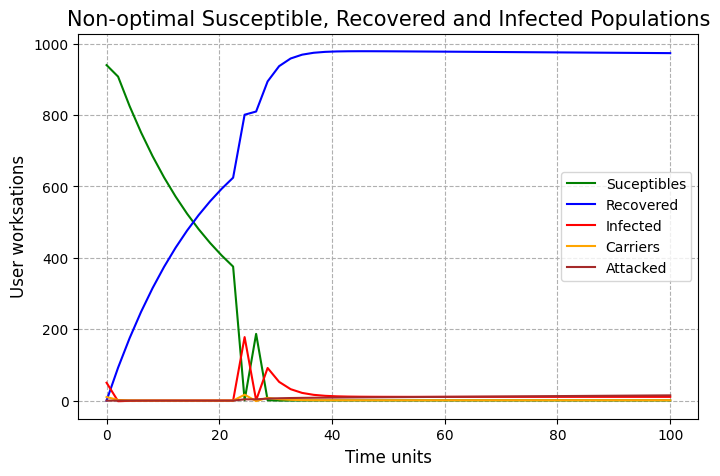

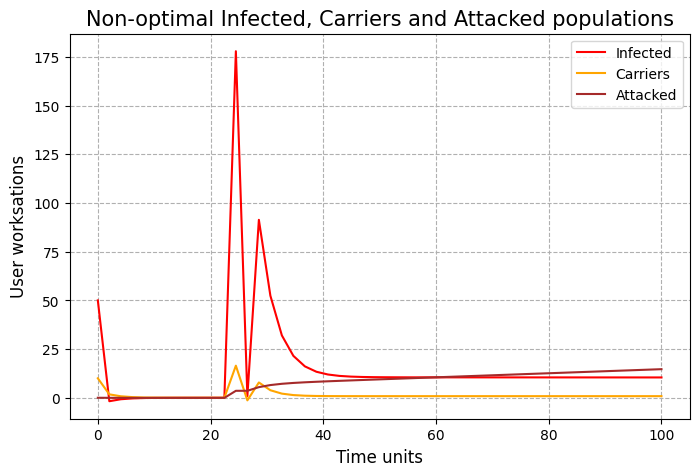

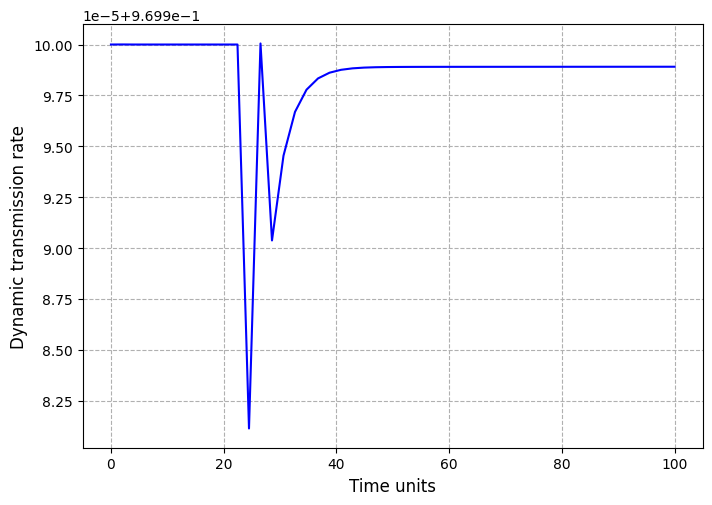

In [ ]:
# Model's Ordinary Differential Equations
# Additional modules
import numpy as np
import matplotlib.pyplot as plt

# Concrete model
m = GEKKO(remote=False)

# Time parameters
n = 50
tf = 100
m.time = np.linspace (0,tf,n)

# Model parameters
N = 1000
Ni = 50
Nc = 10
alpha0 = 0.97
xi = 0.1e-6
delta = 0.9
gamma = 0.01
beta = 5e-6
nu = 0.05
epsilon = 5.5e-3
fc = 1e4

# Values for techical controls
bi = 0.45
bc = 0.65

# State variables
alpha = m.Var(value=alpha0)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
R = m.Var()

# Ordinary Differential Equations
m.Equation(alpha == alpha0/(1+xi*(i+c)))
m.Equation(s.dt() == epsilon*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-epsilon*r+beta*a)
m.Equation(R * fc == alpha*N*(bi+gamma+bc*delta \
            -(bi+gamma)*delta)/(bc*(bi+delta)*(nu+epsilon)))

# Time points
m.time = np.linspace(0,tf,n)

# Solution to the model
m.options.max_iter = 5000
m.options.IMODE = 4
m.solve(disp=False)

# Plot Reproductivity Number
plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")
plt.plot (m.time , R.value , color="black" , label= 'Basic reproduction number')
plt.xlabel("Time units", fontsize=12)
plt.ylabel("Basic reproduction number", fontsize=12)
plt.ylim((0,1.4))
plt.show()
#plt.savefig("DOE_RN.png")

# Plot all populations
plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")
plt.plot (m.time , s.value , color="green", label= 'Suceptible' )
plt.plot (m.time , i.value , color="red", label= 'Infected' )
plt.plot (m.time , c.value , color="orange", label= 'Carriers' )
plt.plot (m.time , a.value , color="brown", label= 'Attacked' )
plt.plot (m.time , r.value , color="blue", label= 'Recovered' )
#plt.title("Non-optimal Populations", fontsize=15)
plt.xlabel("Time units", fontsize=12)
plt.ylabel("User worksations", fontsize=12)
ax.legend(loc="best")
plt.show()
#plt.savefig("DOE_P.png")

# Plot Susceptible, Recovered and Infected populations
plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")
plt.plot (m.time , s.value , color="green" , label= 'Suceptibles' )
plt.plot (m.time , r.value , color="blue" , label= 'Recovered' )
plt.plot (m.time , i.value , color="red" , label= 'Infected' )
plt.plot (m.time , c.value , color="orange" , label= 'Carriers' )
plt.plot (m.time , a.value , color="brown" , label= 'Attacked' )
plt.title("Non-optimal Susceptible, Recovered and Infected Populations", fontsize=15)
plt.xlabel("Time units", fontsize=12)
plt.ylabel("User worksations", fontsize=12)
ax.legend(loc="best")
plt.show()

# Plot Infected, Carriers and Attacked populations
plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")
plt.plot (m.time , i.value , color="red" , label= 'Infected' )
plt.plot (m.time , c.value , color="orange" , label= 'Carriers' )
plt.plot (m.time , a.value , color="brown" , label= 'Attacked' )
plt.title("Non-optimal Infected, Carriers and Attacked populations", fontsize=15)
plt.xlabel("Time units", fontsize=12)
plt.ylabel("User worksations", fontsize=12)
ax.legend(loc="best")
plt.show()

# PLot Distributed Ransomware Transmission Rate
plt.rcParams["figure.figsize"] = [8,5.5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")
plt.plot (m.time , alpha.value , color="blue" )
plt.xlabel("Time units", fontsize=12)
plt.ylabel("Dynamic transmission rate", fontsize=12)
plt.show()
#plt.savefig("DOE_TR.png")